Final exam practice

In [275]:
import numpy as np
import os
from arch import arch_model
import re
import sys
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import sys
from typing import Tuple, Dict, Union, Callable
notebook_dir = "practice"
if os.path.basename(os.getcwd()) == notebook_dir:
    os.chdir(os.pardir)  # Change to parent directory
    sys.path.append(os.getcwd())  # Add the new current directory to sys.path

import cmds.portfolio_management_helper as pmh
import functions.functions_andy as fa
print(os.getcwd())

from sklearn.linear_model import LinearRegression
from dask.distributed import Client, wait
# From HW1
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.metrics import r2_score
from scipy.stats import describe

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

c:\Users\Andik\OneDrive\Desktop\Chicago\Portfolio theory and risk management\githubrepo\finm-portfolio-2024


# Q1 answers
TS test fits returns of each asset to the returns of the factor. Only the alpha and beta matters. 

CS test, the alpha and R squared matters. 

# 1.2
APT holds when the factors fully explain variation between assets. Correlation betwween the residuals of the assets should be 0. If assets have low cross correlation, correlation of residuals should be lower, therefore higher chance for APt to hold.

# 1.3

Returns will increase, higher sharpe ratios, higher volatility. Expectation of returns of assets given the returns are of the top 1% is much higher than 10%. Going long on this set, will result in higher excess returns in next period. Along with shorting the bottom 1%, this will double. More risk taken (less asstes, more volatile, less diversification benefits, taking in more tail risks, and thus rewarded with higher returns)

# 1.4
Yes, over longer horizons, investments have higher sharpe ratio as mean returns scale linearly with time, vol scales with root of time, Sharpe scales with root of time, meaning sharpe increases with time. To long term allocators, just like how more assets bring about diversification benefits. There is room for diversification by investing in more periods where returns are assumed to be IID. By CLT, the mean return distribution over longer period of time has the same mean, but vol scaled by root of number of time periods. Investing over longer time, variation of each period cancel each other, more likely to have a specific return (mean). Average return also has higher certainty. Though confidence interval of this expected return increases.

# 1.5

Before it crashed LTCM performance was little correalted to SPY, beta is small, annualized mean net of fees was little bit worse than SPY. Gross annualized mean outperforms SPY. Very attractive investment as it generated alpha, low correlation with SPY meant that LTCM provided diversification benefits when added to portfolios, low covariance could potentially push the efficient frontier and generate higher risk adjusted returns for the portfolio.

# 1.6
CAPM states that the sharpe ratio of an asset is a fraction of that of the market sharpe ratio. Market sharpe ratio is the maximum, and this is observed from M-V optimisation where the market is the tangency and the tangency has the max sharpe ratio. If investors are not MV investors, the market portfolio is one that has lower sharpe than the optimal/best sharpe created by the tangency portfolio in M-V optimisation. Cant find a better investment. Therefore yes, this will be inconsistent with the CAPM.

# 1.7
The problem is that statistically the covariance matrix of assets tend to be poorly estimated and instable. Illconditioned covariance matrices makes the estimation of weights highly unstable. Out of sample the coviance matrices may have some changes, different from in sample, weights are no longer the optimal. Out of sample performance poor. There are also cases where MV-opttimisation leads to large negative or large positive allocations. 

Solutions explored involve regularizations, such as ridge/lasso regularization, regularization of covariance matrices, adding constraints in the optimisation process such as bounds to the size of weights.

# 1.8

False. Uncovered Interest rate parity states that the expected spot spread should be equal to the premium of risk free rates that the USD have over the foreign currency. Covered interest rate parity states that the difference between forward rate and current spot rate equals that premium. Therefore, substituting CIP formula to UIP in log terms, the forward rate is the best estimator of the future spot rate. Meaning if you take Expectation on both side of CIP, expected value of forward rate at time t less current spot rate is risk premium spread, which is the formula of UIP assuming forward rate is the best predictor of expected spot rate. CIP implies UIP. But UIP does not imply CIP without using CIP.





In [276]:
portfolio_data = pmh.read_excel_default(excel_name="./data/old_final_exam_data.xlsx",sheet_name=0)
portfolio_data.index = pd.to_datetime(portfolio_data.index)
portfolio_data.head()

,SPY,BTC,USO,TLT,IEF,IYR,GLD
date,,,,,,,
2016-01-15,-0.0214,-0.1439,-0.1031,0.0194,0.0078,-0.0307,-0.0151
2016-01-22,0.0144,-0.0214,0.0546,-0.0033,-0.0011,0.0101,0.0088
2016-01-29,0.0168,-0.0101,0.0410,0.0156,0.0115,0.0105,0.0186
2016-02-05,-0.0298,0.0258,-0.0767,0.0131,0.0073,-0.0268,0.0502
2016-02-12,-0.0070,-0.0085,-0.0651,0.0216,0.0076,-0.0420,0.0538


In [277]:
# teangency calculations
tangency_weights = pmh.calc_tangency_weights(returns= portfolio_data,
                                             annual_factor = 52)

mean_returns = portfolio_data.mean()
cov_matrix = portfolio_data.cov()
inv_cov_matrix = np.linalg.inv(cov_matrix)
tangency_weights_2 = inv_cov_matrix @ mean_returns / (np.ones(len(mean_returns)) @ inv_cov_matrix @ mean_returns)

print(tangency_weights)
# print(tangency_weights_2)

portfolio_returns_2 = portfolio_data @ tangency_weights_2 
portfolio_returns = pmh.calc_tangency_weights(returns= portfolio_data,
                                             annual_factor = 52,
                                             return_port_ret=True)
desired_return = 0.0025
allocation_tangency = ((np.ones(len(mean_returns)) @ inv_cov_matrix @ mean_returns)) / (mean_returns.T @ inv_cov_matrix @ mean_returns) * desired_return
print(portfolio_returns)

portfolio_mean = allocation_tangency * tangency_weights_2 @ mean_returns  
print(portfolio_mean)
print(allocation_tangency)



     Tangency Weights
SPY            0.8576
BTC            0.1417
USO           -0.0431
TLT           -0.0405
IEF            0.1674
IYR           -0.4408
GLD            0.3577
            Tangency Portfolio
date                          
2016-01-15             -0.0257
2016-01-22              0.0056
2016-01-29              0.0145
2016-02-05              0.0119
2016-02-12              0.0337
...                        ...
2023-06-16              0.0117
2023-06-23              0.0251
2023-06-30             -0.0069
2023-07-07             -0.0128
2023-07-14              0.0150

[392 rows x 1 columns]
0.0025000000000000005
0.5596685816208018


In [278]:
# assume total returns data 

gmv_weights = pmh.calc_gmv_weights(returns= portfolio_data)
gmv_weights_2 = inv_cov_matrix @ np.ones(len(mean_returns)) / (inv_cov_matrix * np.ones(len(mean_returns))).sum()
gmv_return = gmv_weights_2 @ mean_returns
tangency_return = tangency_weights_2 @ mean_returns

allocation_gmv = 1 - (desired_return - gmv_return) / (tangency_return - gmv_return)
print(f" Global Minimum Variance Portfolio Weights: {gmv_weights}")
print(f" Global Minimum Variance Portfolio Weights checker: {gmv_weights_2}")
print(f" Global Minimum Variance Portfolio Return: {gmv_return}")
print(f" Tangency Portfolio Return: {tangency_return}")
print(f" Allocation to GMV Portfolio: {allocation_gmv}")

# check 
portfolio_return = allocation_gmv * gmv_return + (1 - allocation_gmv) * tangency_return
print(f"Weekly Portfolio Return: {portfolio_return}")

 Global Minimum Variance Portfolio Weights:      GMV Weights
SPY       0.0921
BTC      -0.0010
USO       0.0027
TLT      -0.4770
IEF       1.4270
IYR      -0.0411
GLD      -0.0028
 Global Minimum Variance Portfolio Weights checker: [ 9.20761636e-02 -1.00931882e-03  2.74976706e-03 -4.76952628e-01
  1.42702793e+00 -4.11400656e-02 -2.75184991e-03]
 Global Minimum Variance Portfolio Return: 0.00026819743427197794
 Tangency Portfolio Return: 0.004466929325852084
 Allocation to GMV Portfolio: 0.4684579479333867
Weekly Portfolio Return: 0.0025000000000000005


In part 1, the global minimum variance portfolio is given by the risk free rate, in part 2, global minimum variance portfolio is obtained by an optimisation to minimize portfolio variance subject to constraint that sum of weights equal 1, and no cosntraint on desired return. The tangency calculation in part 2 is the same as that in part one, therefore tangnecy weights should be the same in both part one and part 2. Portfolio one, any desired excess return is given by an allocation to a single portfolio which is the tangency portfolio optimised by minimize portfolio variance subject to constraint that sum of weights equal 1, and cosntraint on desired return to be a target of 0.0025. 

Therefore, main difference is that in part 1, a mean variance optimization would lead to allocation in a risk free rate and tangency portfolio or just tangency portfolio (excess returns). Part 2, allocation between 2 optimised portfolios (namely the GMV and tangency portfolio), and linear allocation between the two to attain a desired target.

In [279]:
portfolio_data_dropped = portfolio_data.drop(columns="BTC")
portfolio_data_dropped_2011 = portfolio_data_dropped.loc[:"2021",:]
tangency_weights = pmh.calc_tangency_weights(returns= portfolio_data_dropped_2011,
                                                annual_factor = 52)
mean_returns = portfolio_data_dropped_2011.mean()
cov_matrix = portfolio_data_dropped_2011.cov()
inv_cov_matrix = np.linalg.inv(cov_matrix)
tangency_weights_2 = inv_cov_matrix @ mean_returns / (np.ones(len(mean_returns)) @ inv_cov_matrix @ mean_returns)
print(f"Tangency Weights: {tangency_weights}")
print(f"Tangency Weights Checker: {tangency_weights_2}")

portfolio_returns_2 = portfolio_data_dropped_2011 @ tangency_weights_2
portfolio_returns = pmh.calc_tangency_weights(returns= portfolio_data_dropped_2011,
                                             annual_factor = 52,
                                             return_port_ret=True)
desired_return = 0.0025
allocation_tangency = ((np.ones(len(mean_returns)) @ inv_cov_matrix @ mean_returns)) / (mean_returns.T @ inv_cov_matrix @ mean_returns) * desired_return
portfolio_mean_in_sample = allocation_tangency * tangency_weights_2 @ mean_returns
print(f"Portfolio Mean In Sample: {portfolio_mean_in_sample}")
# out of sample
OOS_data = portfolio_data_dropped.loc["2022":,:]
portfolio_returns_OOS = OOS_data @ tangency_weights_2

mean_portfolio_returns = portfolio_returns_OOS.mean() * 52 * allocation_tangency
std_portfolio_returns = portfolio_returns_OOS.std() * np.sqrt(52) * allocation_tangency
sharpe_ratio = mean_portfolio_returns / std_portfolio_returns
print(f"OOS Mean Portfolio Returns: {mean_portfolio_returns}")
print(f"Standard Deviation OOS Portfolio Returns: {std_portfolio_returns}")
print(f"OOS Sharpe Ratio: {sharpe_ratio}")
display(pmh.calc_summary_statistics(portfolio_returns_OOS.to_frame("OOS") * allocation_tangency, annual_factor=52))

# equal weright portfolio 
equal_weights = np.ones(len(mean_returns)) / len(mean_returns)
port_return = (portfolio_data_dropped_2011 @ equal_weights).mean() 
equal_weights = equal_weights * (desired_return / port_return)
equal_weight_returns = OOS_data @ equal_weights
mean_equal_weight_returns = equal_weight_returns.mean() * 52
std_equal_weight_returns = equal_weight_returns.std() * np.sqrt(52)
sharpe_ratio_equal = mean_equal_weight_returns / std_equal_weight_returns
print(f"Mean Equal Weight Portfolio Returns: {mean_equal_weight_returns}")
print(f"Standard Deviation Equal Weight Portfolio Returns: {std_equal_weight_returns}")
print(f"Equal Weight Sharpe Ratio: {sharpe_ratio_equal}")

display(pmh.calc_summary_statistics(equal_weight_returns.to_frame("Equal Weight") , annual_factor=52))

equal_weights = pmh.calc_equal_weights(returns=portfolio_data_dropped_2011)
port_return = (portfolio_data_dropped_2011 @ equal_weights).mean() 
equal_weights = equal_weights * (desired_return / port_return)

equal_weight_returns = OOS_data @ equal_weights
mean_equal_weight_returns = equal_weight_returns.mean() * 52
std_equal_weight_returns = equal_weight_returns.std() * np.sqrt(52)
sharpe_ratio_equal = mean_equal_weight_returns / std_equal_weight_returns
print(f"Mean Equal Weight Portfolio Returns: {mean_equal_weight_returns}")

Tangency Weights:      Tangency Weights
SPY            0.3772
USO           -0.0185
TLT           -0.1489
IEF            0.9122
IYR           -0.1347
GLD            0.0127
Tangency Weights Checker: [ 0.37716668 -0.01852721 -0.14889972  0.91222915 -0.13467464  0.01270575]
Portfolio Mean In Sample: 0.0024999999999999996
OOS Mean Portfolio Returns: -0.07042963437956827
Standard Deviation OOS Portfolio Returns: 0.16352702917402354
OOS Sharpe Ratio: -0.43069108963398267
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe,Min,Max,Skewness,Excess Kurtosis,...,Annualized Historical VaR (5.00%),Historical CVaR (5.00%),Annualized Historical CVaR (5.00%),Max Drawdown,Peak,Bottom,Tangency Weights,Recovery,Duration (days),OOS Correlation
OOS,-0.0014,-0.0704,0.0227,0.1635,-0.0597,-0.4307,-0.0466,0.0629,0.3086,-0.1623,...,-0.2385,-0.0415,-0.2992,-0.2516,2022-01-07,2022-10-14,1.0000,NaT,NaN,1.0000


Mean Equal Weight Portfolio Returns: -0.03656851636179485
Standard Deviation Equal Weight Portfolio Returns: 0.1835908468733594
Equal Weight Sharpe Ratio: -0.19918485580612713
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe,Min,Max,Skewness,Excess Kurtosis,...,Annualized Historical VaR (5.00%),Historical CVaR (5.00%),Annualized Historical CVaR (5.00%),Max Drawdown,Peak,Bottom,Tangency Weights,Recovery,Duration (days),Equal Weight Correlation
Equal Weight,-0.0007,-0.0366,0.0255,0.1836,-0.0276,-0.1992,-0.0542,0.0709,0.3137,-0.1172,...,-0.2961,-0.0486,-0.3506,-0.2582,2022-03-04,2022-10-14,1.0000,NaT,NaN,1.0000


Mean Equal Weight Portfolio Returns: Equal Weights   -0.0366
dtype: float64


In [280]:
# Q3 
forecasting_data = pmh.read_excel_default(excel_name="./data/old_final_exam_data.xlsx",sheet_name=1)
forecasting_data.index = pd.to_datetime(forecasting_data.index)
forecasting_data.head()

,USO,Tnote rate,Tnote rate change
date,,,
2009-05-31,0.2714,3.4650,0.3410
2009-06-30,0.0420,3.5230,0.0580
2009-07-31,-0.0295,3.5010,-0.0220
2009-08-31,-0.0206,3.4010,-0.1000
2009-09-30,0.0039,3.3070,-0.0940


In [281]:
forecasting_regression_data = forecasting_data.apply(lambda x: x.shift(1) if "USO" not in x.name else x)
forecasting_regression_data = forecasting_regression_data.dropna()
display(forecasting_regression_data.head())

model = LinearRegression(fit_intercept=True)
X = forecasting_regression_data.drop(columns="USO")
y = forecasting_regression_data["USO"].values.reshape(-1,1)
model.fit(X,y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R2: {r2}")
print(f"Alpha unannualized: {model.intercept_[0]}")
print(f"Alpha annualized: {model.intercept_[0] * 12}")
print(f"Betas: {model.coef_[0]}")

# Validation 
regression_satts_2 = pmh.calc_iterative_regression(multiple_y=forecasting_regression_data.loc[:,["USO"]],
                                                   X = forecasting_regression_data.drop(columns="USO"),
                                                   annual_factor=12)
display(regression_satts_2.T)

,USO,Tnote rate,Tnote rate change
date,,,
2009-06-30,0.0420,3.4650,0.3410
2009-07-31,-0.0295,3.5230,0.0580
2009-08-31,-0.0206,3.5010,-0.0220
2009-09-30,0.0039,3.4010,-0.1000
2009-10-31,0.0865,3.3070,-0.0940


R2: 0.02813716766965546
Alpha unannualized: 0.020120399914827315
Alpha annualized: 0.24144479897792778
Betas: [-0.00956884  0.07406127]
"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,USO
Alpha,0.0201
Annualized Alpha,0.2414
R-Squared,0.0281
Tnote rate Beta,-0.0096
Tnote rate change Beta,0.0741
Information Ratio,0.1983
Annualized Information Ratio,0.6871
Tracking Error,0.1014
Annualized Tracking Error,0.3514
Fitted Mean,-0.0019


In [282]:
forecasted_returns = y_pred.flatten() 
trading_weights = 0.50 + 50 * forecasted_returns
strategy_returns = forecasting_regression_data.loc[:,["USO"]].mul(trading_weights, axis=0)
print(f"First 5 strategy returns:")
display(strategy_returns.head())
print(f"Last 5 strategy returns:")
display(strategy_returns.tail())



First 5 strategy returns:


,USO
date,
2009-06-30,0.0467
2009-07-31,-0.0010
2009-08-31,0.0052
2009-09-30,-0.0019
2009-10-31,-0.0367


Last 5 strategy returns:


,USO
date,
2023-07-31,0.0534
2023-08-31,0.0034
2023-09-30,0.0034
2023-10-31,-0.0791
2023-11-30,-0.0097


In [283]:
# passive strategy
passive_returns = forecasting_regression_data.loc[:,["USO"]]
null_forecasts = forecasting_regression_data.loc[:,["USO"]].expanding(min_periods=1).mean()
all_strat_retunrs = pd.concat([strategy_returns, passive_returns, null_forecasts], axis=1)
all_strat_retunrs.columns = ["Weighted Forecast", "Most recent as forecast", "Null forecast (expanding mean)"]
display(all_strat_retunrs.head())

display(pmh.calc_summary_statistics(all_strat_retunrs, annual_factor=12).T)


,Weighted Forecast,Most recent as forecast,Null forecast (expanding mean)
date,,,
2009-06-30,0.0467,0.0420,0.0420
2009-07-31,-0.0010,-0.0295,0.0063
2009-08-31,0.0052,-0.0206,-0.0027
2009-09-30,-0.0019,0.0039,-0.0011
2009-10-31,-0.0367,0.0865,0.0164


Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Weighted Forecast,Most recent as forecast,Null forecast (expanding mean)
Mean,0.0140,-0.0019,-0.0029
Annualized Mean,0.1684,-0.0230,-0.0344
Vol,0.0885,0.1029,0.0068
Annualized Vol,0.3066,0.3565,0.0236
Sharpe,0.1586,-0.0186,-0.4204
Annualized Sharpe,0.5494,-0.0644,-1.4563
Min,-0.2757,-0.5545,-0.0143
Max,0.4015,0.3536,0.0420
Skewness,0.7901,-1.1246,1.9823
Excess Kurtosis,3.3867,5.7599,9.5963


In [284]:
# decompose active strategy
model = LinearRegression(fit_intercept=True)
X = all_strat_retunrs["Most recent as forecast"].values.reshape(-1,1)
y = all_strat_retunrs["Weighted Forecast"].values.reshape(-1,1)
model.fit(X,y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R2: {r2}")
print(f"Alpha unannualized: {model.intercept_[0]}")
print(f"Alpha annualized: {model.intercept_[0] * 12}")
print(f"Betas: {model.coef_[0]}")
print(f"Hedge ratio optimal: {model.coef_[0]}")
print(f"This means goint short the passive strategy by 0.235 times investment in the active strategy")
basis = y - X * model.coef_[0][0]
basis_risk = basis.std() 
basis_mean = np.mean(basis, dtype=np.float64)
print(f"Mean return of hedged strategy (annualised): {basis_mean*12}")
print(f"Standard deviation of hedged strategy (annualised): {basis_risk*np.sqrt(12)}")

R2: 0.07490821776468026
Alpha unannualized: 0.014487554567227588
Alpha annualized: 0.17385065480673106
Betas: [0.2354139]
Hedge ratio optimal: [0.2354139]
This means goint short the passive strategy by 0.235 times investment in the active strategy
Mean return of hedged strategy (annualised): 0.173850654806731
Standard deviation of hedged strategy (annualised): 0.29404474123934826


In [285]:
# rollin OOS performance
train_data = forecasting_regression_data.loc[:"2017"]
test_data = forecasting_regression_data.loc["2018":]
train_size = len(train_data)
test_size = len(test_data)
OOS_predictions_weighted = []
for i in range(train_size,len(forecasting_regression_data)):
    train_data = forecasting_regression_data.iloc[:i]
    test_data = forecasting_regression_data.iloc[i:i+1]
    model = LinearRegression(fit_intercept=True)
    X = train_data.drop(columns="USO")
    y = train_data["USO"].values.reshape(-1,1)
    model.fit(X,y)
    y_pred = model.predict(test_data.drop(columns="USO")).flatten()
    OOS_predictions_weighted.append(y_pred)
# OOS_weights = 0.50 + 50 * OOS_predictions_weighted[0]
# OOS_strategy_returns = forecasting_regression_data.loc[:,["USO"]].tail(test_size).mul(OOS_weights, axis=0)
OOS_strategy_returns = pd.DataFrame(OOS_predictions_weighted, index=forecasting_regression_data.index[train_size:])
OOS_strategy_returns.columns = ["OOS Strategy Returns"]

# rsquare 
r_squqare_OOS = r2_score(forecasting_regression_data.loc["2018":,"USO"], OOS_strategy_returns)
display(OOS_strategy_returns.head())

display(OOS_strategy_returns.tail())

print(f"R2 OOS: {r_squqare_OOS}")
    
    
    


,OOS Strategy Returns
date,
2018-01-31,-0.0076
2018-02-28,0.0022
2018-03-31,-0.0051
2018-04-30,-0.0120
2018-05-31,-0.0023


,OOS Strategy Returns
date,
2023-07-31,-0.0062
2023-08-31,-0.0064
2023-09-30,-0.0070
2023-10-31,0.0192
2023-11-30,-0.0023


R2 OOS: -0.01644989938054331


,Weighted Forecast,Most recent as forecast,Null forecast (expanding mean),OOS Strategy Returns,USO
date,,,,,
2018-01-31,0.0251,0.0808,-0.0066,-0.0076,0.0808
2018-02-28,-0.0644,-0.0470,-0.0070,0.0022,-0.0470
2018-03-31,0.0397,0.0582,-0.0064,-0.0051,0.0582
2018-04-30,-0.0150,0.0542,-0.0058,-0.0120,0.0542
2018-05-31,-0.0149,-0.0181,-0.0060,-0.0023,-0.0181


Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Weighted Forecast,Most recent as forecast,Null forecast (expanding mean),OOS Strategy Returns,USO
Mean,0.0293,0.0062,-0.0054,-0.0045,0.0062
Annualized Mean,0.3521,0.0742,-0.0654,-0.0536,0.0742
Vol,0.1110,0.1299,0.0029,0.0176,0.1299
Annualized Vol,0.3845,0.4499,0.0100,0.0608,0.4499
Sharpe,0.2643,0.0476,-1.8857,-0.2544,0.0476
Annualized Sharpe,0.9157,0.1648,-6.5322,-0.8813,0.1648
Min,-0.1955,-0.5545,-0.0143,-0.0540,-0.5545
Max,0.4015,0.3536,-0.0013,0.0353,0.3536
Skewness,0.8661,-1.4182,-0.7068,-0.4826,-1.4182
Excess Kurtosis,1.5111,5.1658,0.1627,1.5069,5.1658


<Axes: >

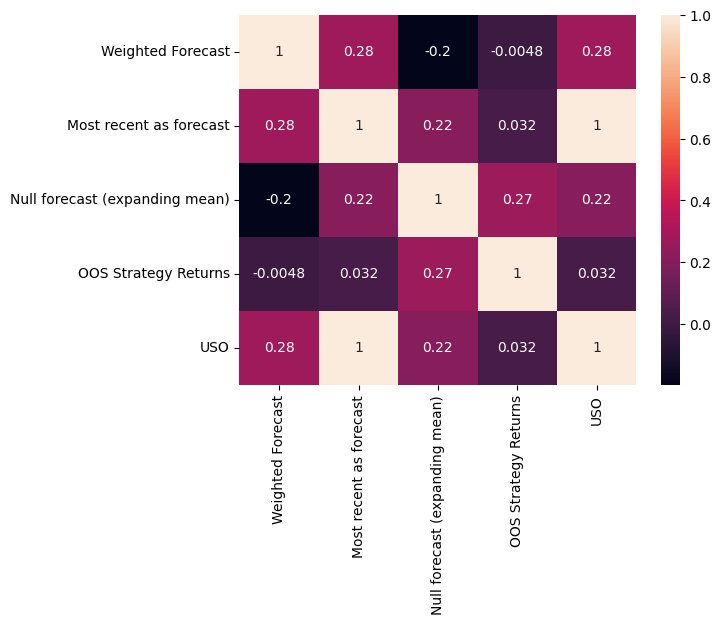

In [286]:
strat_new_data = all_strat_retunrs.loc["2018":].merge(OOS_strategy_returns, left_index=True, right_index=True).merge(forecasting_regression_data.loc["2018":,"USO"], left_index=True, right_index=True)
display(strat_new_data.head())
display(pmh.calc_summary_statistics(strat_new_data, annual_factor=12).T)
display(sns.heatmap(strat_new_data.corr(), annot=True))

In [287]:
# Q4

fx_data = pmh.read_excel_default(excel_name="./data/old_final_exam_data.xlsx",sheet_name=2)
fx_data.index = pd.to_datetime(fx_data.index)
display(fx_data.head())

log_fx_data = fx_data.copy()
log_fx_data["MXN_log"] = np.log(fx_data["MXN"])
log_fx_data["SOFR_log"] = np.log1p(fx_data["SOFR"])
log_fx_data["MXSTR_log"] = np.log1p(fx_data["MXSTR"])

display(log_fx_data.mean().to_frame("Mean Unannualized"))

,MXN,SOFR,MXSTR
date,,,
2018-04-03,0.0550,0.0001,0.0003
2018-04-04,0.0549,0.0001,0.0003
2018-04-05,0.0552,0.0001,0.0003
2018-04-06,0.0546,0.0001,0.0003
2018-04-09,0.0549,0.0001,0.0003


,Mean Unannualized
MXN,0.0509
SOFR,0.0001
MXSTR,0.0003
MXN_log,-2.9813
SOFR_log,0.0001
MXSTR_log,0.0003


In [288]:
risk_premium = log_fx_data["SOFR_log"] - log_fx_data["MXSTR_log"] 
log_fx_data["risk_premium"] = risk_premium
log_fx_data["future_spot"] = log_fx_data["MXN_log"].shift(-1)
log_fx_data = log_fx_data.dropna()
spot_spread = log_fx_data["future_spot"] - log_fx_data["MXN_log"]
log_fx_data["spot_spread"] = spot_spread
Excess_log_return = spot_spread - risk_premium
display(pmh.calc_summary_statistics(Excess_log_return.to_frame("Excess Log Return"), annual_factor=252).T)

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Excess Log Return
Mean,0.0003
Annualized Mean,0.0667
Vol,0.0081
Annualized Vol,0.1286
Sharpe,0.0327
Annualized Sharpe,0.5186
Min,-0.0555
Max,0.0535
Skewness,-0.7615
Excess Kurtosis,6.1687


In [289]:
print(f"Risk premium of us over mxn: {risk_premium.mean()}")
print(f"Spot spread: {spot_spread.mean()}")
print(f"Excess log return: {Excess_log_return.mean()}")

Risk premium of us over mxn: -0.00021860993611677387
Spot spread: 4.59629113575587e-05
Excess log return: 0.00026471344260093146


Long MXN is better over USD over the sample, as one will be able to earn positive excess returns. Spot spread cumulative sum over sample is positive, meaning MXN appreciated, USD depreiciated relative to MXN.

In [290]:
X = log_fx_data["risk_premium"].values.reshape(-1,1)
y = log_fx_data["spot_spread"].values.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R2: {r2}")
print(f"Alpha unannualized: {model.intercept_[0]}")
print(f"Alpha annualized: {model.intercept_[0] * 252}")
print(f"Betas: {model.coef_[0]}")


R2: 0.0004141588691970455
Alpha unannualized: 0.0012365888003739811
Alpha annualized: 0.3116203776942432
Betas: [5.44284799]


In [291]:
log_fx_data.loc[:,["risk_premium","spot_spread"]]

,risk_premium,spot_spread
date,,
2018-04-03,-0.0002,-0.0019
2018-04-04,-0.0002,0.0057
2018-04-05,-0.0002,-0.0111
2018-04-06,-0.0002,0.0057
2018-04-09,-0.0002,-0.0026
...,...,...
2023-11-22,-0.0002,0.0044
2023-11-24,-0.0002,-0.0015
2023-11-27,-0.0002,0.0020


IF UIP holds, beta should be 1, alpha should be 0. R squared one.

If we observe an increae in interest rate on USD relative to MXN, risk premium increases, with positive beta spot spread will increase, MXN will appreciate, the forward exchange rate will be higher than the spot exchange rate, USD depreciates

MXN risk free rate increases relative to USD, we should expect depreciation of MXN, appreciation of USD.

forecasted impact should be larger over annual horizon due to autoregressive nature of risk free rates. Autocorrelation in spot spreads.